In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

/var/folders/rk/3cjh1nsx2nq4f1s4lvbzsp480000gn/T/ipykernel_5700/1247023268.py:39: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Loading both dataframes

In [19]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)

printing the infor for each dataframe

In [20]:
df_TheGeneral.info()
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

showing the head of the general df

In [22]:
df_TheGeneral.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,4,1,5086.61,PA0002364104,No fault,C,HAIL,2018-08-06 00:00:00,98,CO,CO,NO,2018-05-29 00:00:00,1,9.0,5086.61,0.0,0.0
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS035ZXBZEH1,2,1,21397.74,PA0002344011,Insured at fault,C,PG_COLLISIONINTERSECTION,2018-06-17 00:00:00,1,CO,CO,NO,2018-05-25 00:00:00,1,53.0,21397.74,0.0,0.0
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348918,No fault,C,HAIL,2018-06-19 00:00:00,98,CO,CO,YES,2018-06-01 00:00:00,2,14.0,0.00,0.0,0.0
4,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348997,No fault,C,GLASSBREAKAGE,2018-06-30 00:00:00,1,CO,CO,NO,2018-06-01 00:00:00,2,1.0,0.00,0.0,0.0


showing the head for the masterquote df

In [23]:
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,NaN,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


## Data Engineering
* I will start my calculating nan values in each column and dropping all columns where the nan value is greater than 20%

In [4]:
#first calculate percentage of nan in each column and 
#put that to variable nan_percentage
gen_nan_percentage = df_TheGeneral.isnull().mean() * 100
mast_nan_percentage = df_MasterQuote.isnull().mean() * 100

#now we drop columns where nan values are greater than 20%
general_cleaned = df_TheGeneral.loc[:, gen_nan_percentage <= 20]
master_cleaned = df_MasterQuote.loc[:, mast_nan_percentage <= 20]

displaying infor for both dataframes to see if we deleted any columns that contained more than 20% null values

In [5]:
#info for each dataframe
general_cleaned.info()
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

We can see that it eliminated 1 column from the masterquote dataframe which was PolicyNumber
* It is also important to notice that the MasterQuote df no longer has any NaN values

## Filling NaN Values
I will handle all nan values for the df_General dataset. This will be done by filling nan values of categorical columns with the mode of the column.  I will fill nan values for integer columns with the median of the column
* note that I do not have to fill nan values for the Master Quote dataframe because there is no missing values

In [6]:
#fill nan values for categorical columns with the mode
for column in general_cleaned.select_dtypes(include=['object']).columns:
    general_cleaned[column].fillna(general_cleaned[column].mode()[0], inplace=True)
    
#fill nan values for numerical columns with the median
for column in general_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    general_cleaned[column].fillna(general_cleaned[column].median(), inplace=True)
    
general_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      11069 non-null  object 
 15  SubrogrationFlag     11069 non-null 

we can see that there is no more missing values but to make sure I will show a missing value matrix for the general df

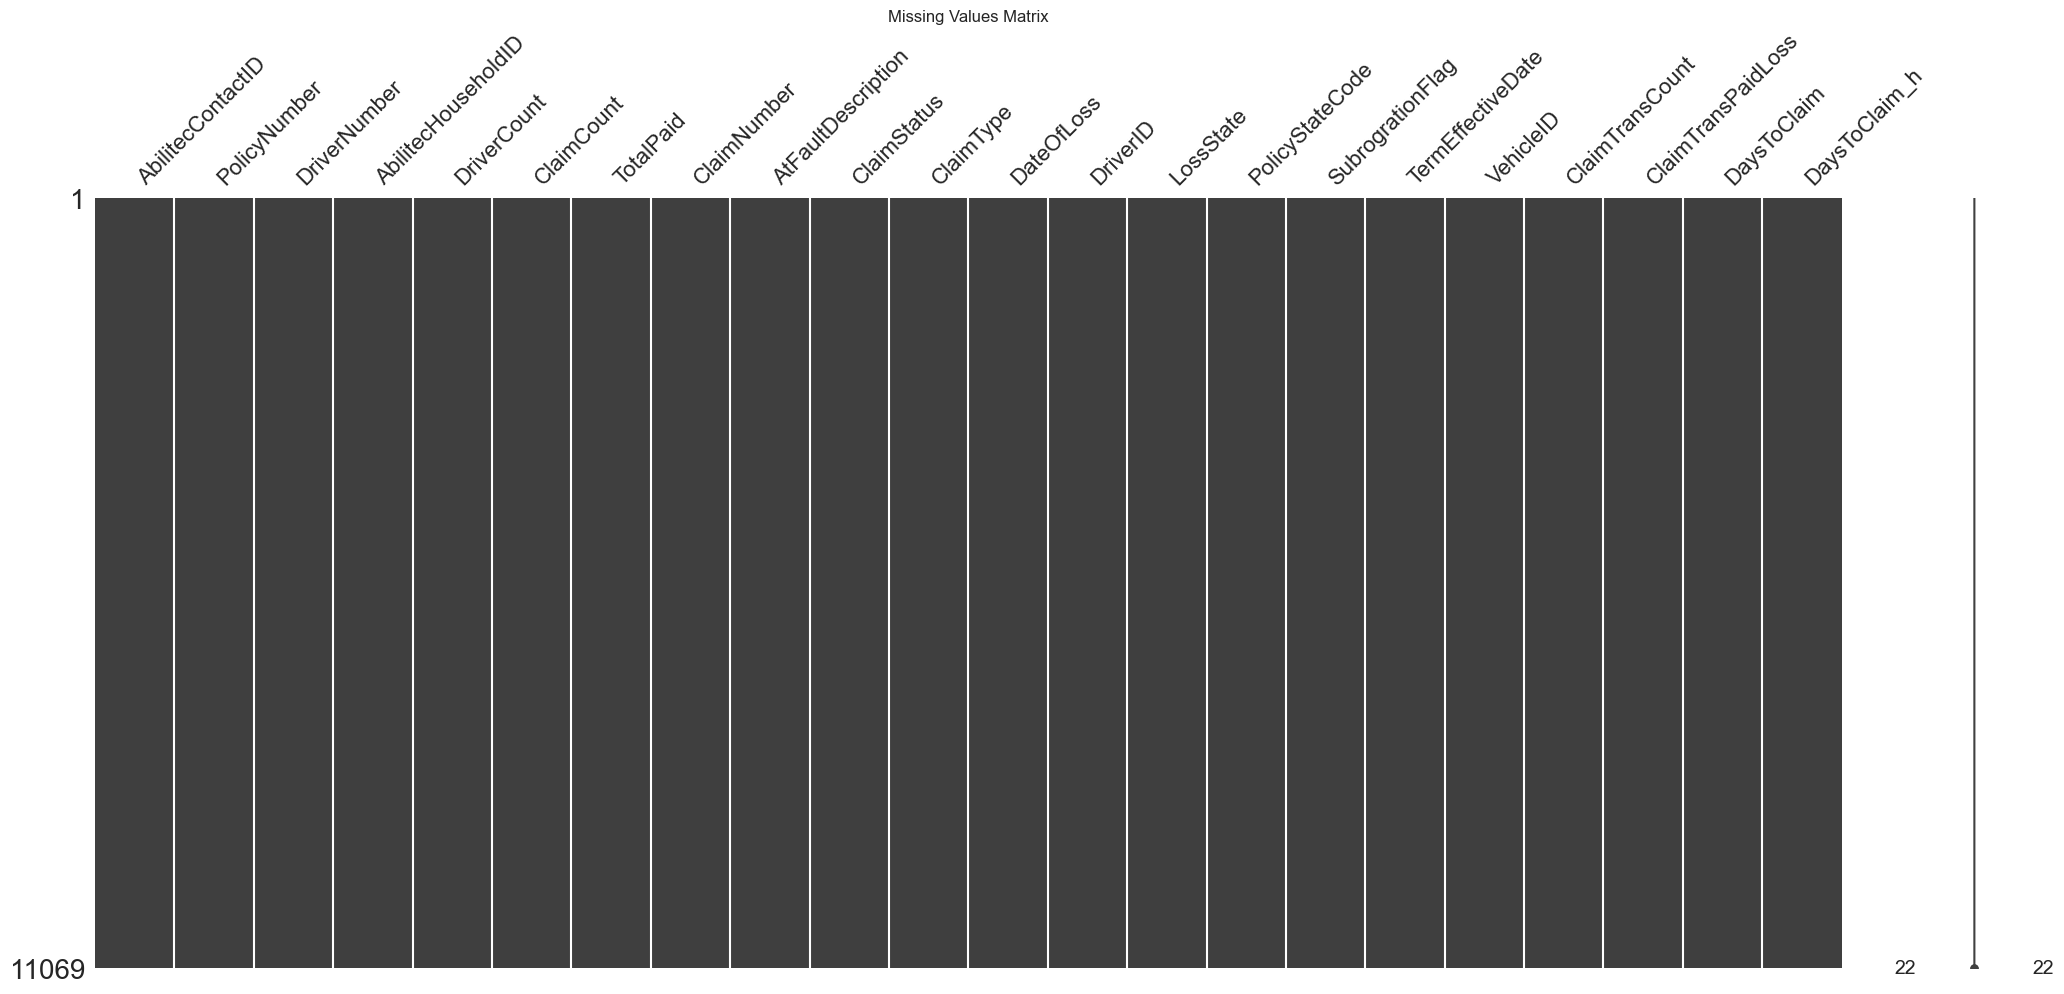

In [7]:
#Now show missing value matrix to ensure that took care of all missing values
msno.matrix(general_cleaned)
plt.title("Missing Values Matrix")
plt.show()

missing value matrix for master quote df

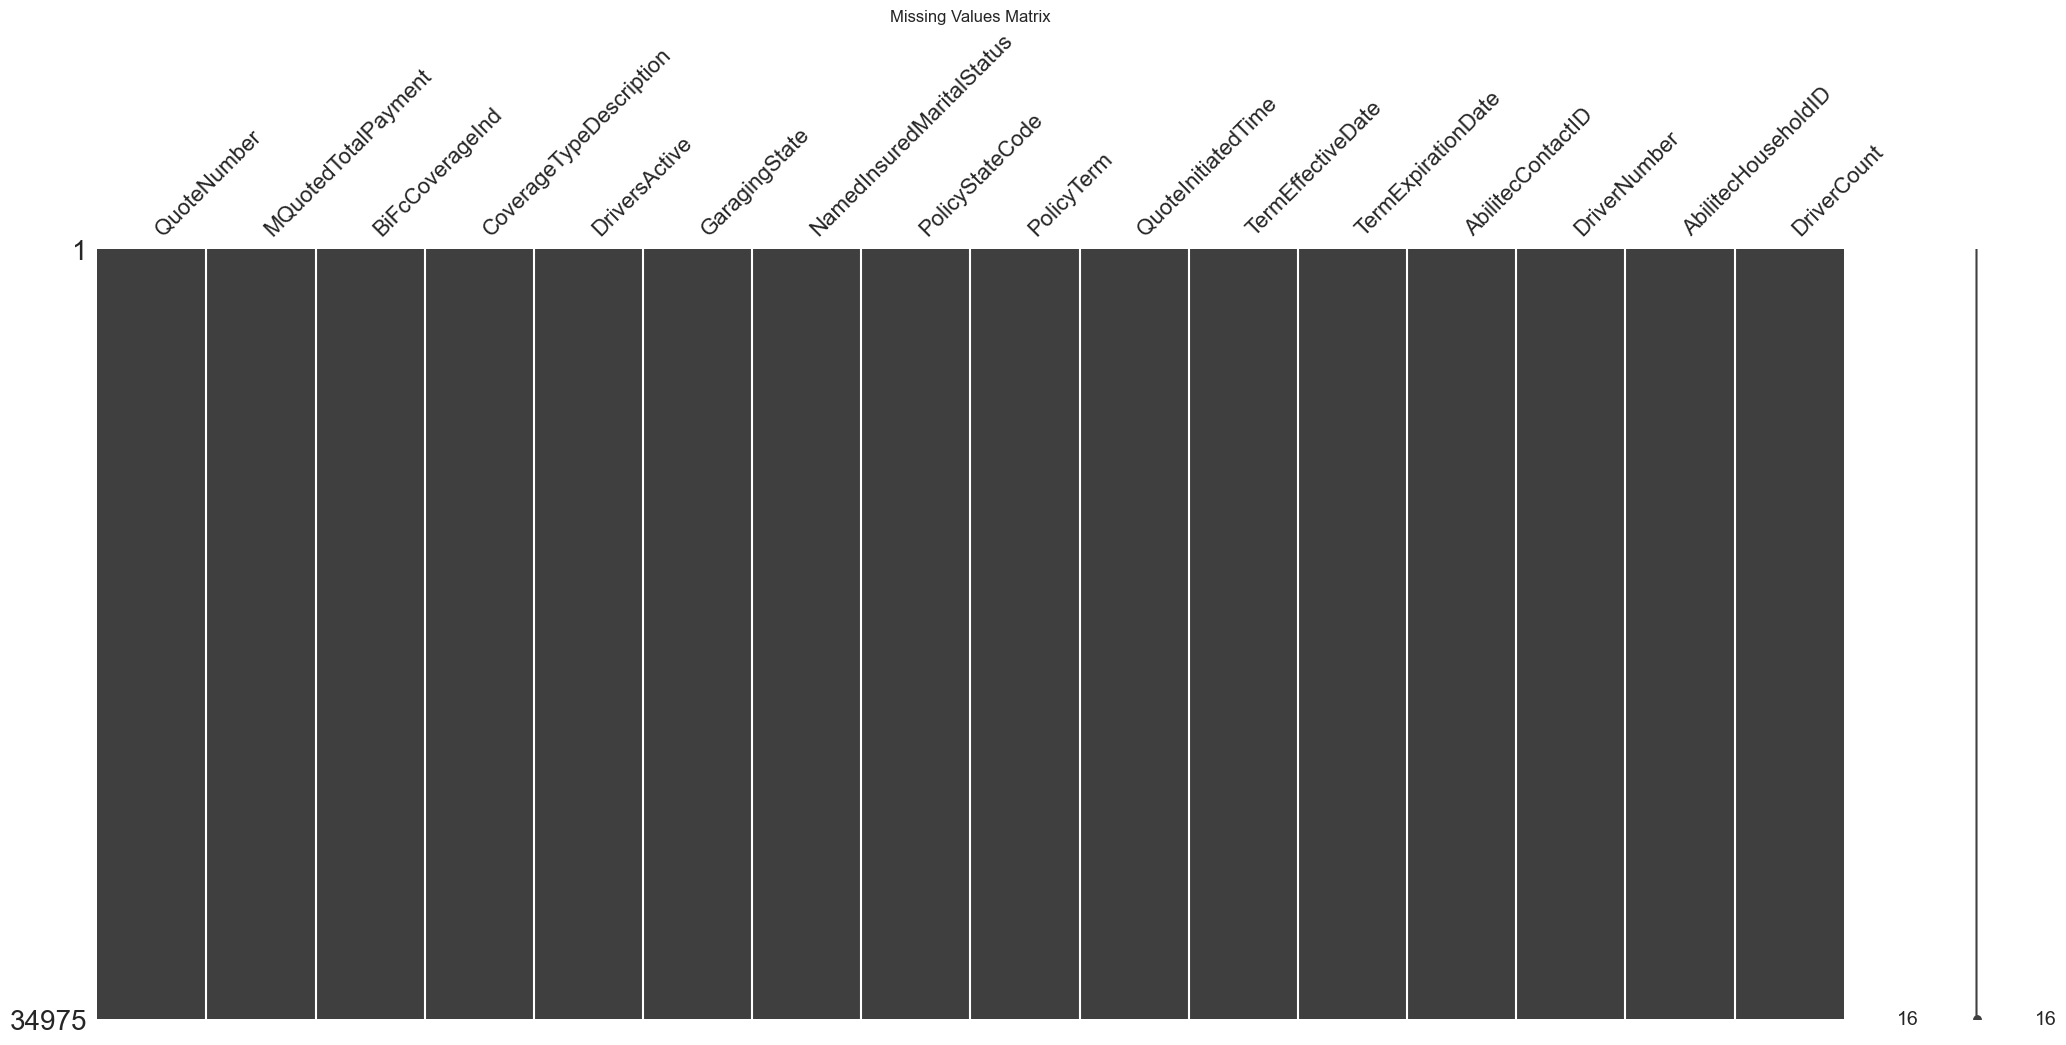

In [8]:
#Now show missing value matrix to ensure that took care of all missing values
msno.matrix(master_cleaned)
plt.title("Missing Values Matrix")
plt.show()

We can see all nan values are taken care of

## Assessing Object Variables
* I will only create dummy variables that have less than 20 unique columns

In [9]:
#first i will print out all categorical columns so I know which columns need dummy variables

#this will be for general df
gen_object_columns = general_cleaned.select_dtypes(include=['object']).columns
print(gen_object_columns)

# this iwll be for master df
mast_object_columns = master_cleaned.select_dtypes(include=['object']).columns
print(mast_object_columns)



Index(['AbilitecContactID', 'PolicyNumber', 'AbilitecHouseholdID',
       'ClaimNumber', 'AtFaultDescription', 'ClaimStatus', 'ClaimType',
       'DateOfLoss', 'LossState', 'PolicyStateCode', 'SubrogrationFlag',
       'TermEffectiveDate'],
      dtype='object')
Index(['QuoteNumber', 'BiFcCoverageInd', 'CoverageTypeDescription',
       'GaragingState', 'NamedInsuredMaritalStatus', 'PolicyStateCode',
       'QuoteInitiatedTime', 'TermEffectiveDate', 'TermExpirationDate',
       'AbilitecContactID', 'AbilitecHouseholdID'],
      dtype='object')


* from that code I can see that there is columns that will be completely unique to that person (AbilitecContactID, AbilitecHouseholdID, QuoteNumber) in the master dataframe and (AbilitecContactID, AbilitecHouseholdID) for the general df

This code will count the amount of unique things in each categorical column

In [10]:
# Count unique entries for each object column
gen_unique_counts = general_cleaned[gen_object_columns].nunique()
mast_unique_counts = master_cleaned[mast_object_columns].nunique()

print(gen_unique_counts)
print(mast_unique_counts)

AbilitecContactID       7349
PolicyNumber            7836
AbilitecHouseholdID     7505
ClaimNumber            11069
AtFaultDescription         5
ClaimStatus                2
ClaimType                 58
DateOfLoss              2644
LossState                 54
PolicyStateCode           47
SubrogrationFlag           2
TermEffectiveDate       2171
dtype: int64
QuoteNumber                  34975
BiFcCoverageInd                  4
CoverageTypeDescription          3
GaragingState                   47
NamedInsuredMaritalStatus        7
PolicyStateCode                 47
QuoteInitiatedTime           34437
TermEffectiveDate             1230
TermExpirationDate            1381
AbilitecContactID            21119
AbilitecHouseholdID          22449
dtype: int64


I will only create dummy variables for columns that have less than 20 unique values

## Dummy Variables
* Now we start creating dummy variables for all categorical columns

In [11]:
#i will get dummy variables for each categorical variable except the IDs and Quote numbers
#this is because they are unique and would create way to many columns
#also ids are unique to each person so wouldnt have much significance in predicting
#the quote

#The only categorical columns to include are the ones with less than 20 unique values


#identofying which columns to create dummy variables for in general df
gen_cat = [col for col in gen_object_columns if col not in ['AbilitecContactID', 'AbilitecHouseholdID', 'PolicyNumber', 'ClaimNumber', 'TermEffectiveDate', 'PolicyStateCode', 'DateOfLoss', 'ClaimType']] #, 'LossState']]
#identify which columns to create dummy variables for in master df
mast_cat = [col for col in mast_object_columns if col not in ['AbilitecContactID', 'AbilitecHouseholdID', 'QuoteNumber', 'QuoteInitiatedTime', 'TermExpirationDate', 'TermEffectiveDate', 'PolicyStateCode']] #, 'GaragingState' ]]

#generate dummy variables for all categprical columns in gen df
gen_encoded = pd.get_dummies(general_cleaned, columns=gen_cat, drop_first=False)
#generate dummy variables for all cat columns in master quote df
mast_encoded = pd.get_dummies(master_cleaned, columns=mast_cat, drop_first=True)

This code assigns gen_encoded and mast_encoded back to the df names general_cleaned and master_cleaned. It will also show the head of each file so I can ensure all dummy variables were made.

In [12]:
general_cleaned = gen_encoded
master_cleaned = mast_encoded

#general_cleaned.head()
master_cleaned.head()

,QuoteNumber,MQuotedTotalPayment,DriversActive,GaragingState,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount,BiFcCoverageInd_BI NOFC,BiFcCoverageInd_NOBI FC,BiFcCoverageInd_NOBI NOFC,CoverageTypeDescription_Full Coverage,CoverageTypeDescription_Liability Only,NamedInsuredMaritalStatus_Divorced,NamedInsuredMaritalStatus_Domestic Partner,NamedInsuredMaritalStatus_Married,NamedInsuredMaritalStatus_Separated,NamedInsuredMaritalStatus_Single,NamedInsuredMaritalStatus_Widowed
0,MzM0MDA0OTE=,1136.0,1,OR,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1,1,0,0,0,1,0,0,0,0,1,0
1,MzM0MDQxNzU=,0.0,1,IL,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1,0,0,1,0,1,1,0,0,0,0,0
2,MzM0MTc2MTk=,1160.0,2,NV,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2,1,0,0,0,1,0,0,1,0,0,0
3,MzM0MTk3MjQ=,3054.0,2,RI,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1,0,0,0,1,0,0,0,1,0,0,0
4,MzM0MjAxMjU=,0.0,1,OH,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1,0,0,1,0,1,0,0,0,0,1,0


### Brief Summary
* I created two clean dataframes for general df and master df called general_cleaned and master_cleaned.  In the dataframes I did not do dummy variables for categorical variables that were unique to each person because it cluded the dataset and made it hard to work with.  By eliminating the quote numbers, and IDs i went from close to 30000 columns to less than 5000 for each dataframe.  This will make it easier to work with

I will now drop all categorical variables in the cleaned dataframe that contains the dummy variables

In [13]:
general_cleaned = general_cleaned.drop(columns=general_cleaned.select_dtypes(include=['object']).columns)

master_cleaned = master_cleaned.drop(columns=master_cleaned.select_dtypes(include=['object']).columns)

info of general df to ensure the columns were dropped and the dummy variables were created

In [14]:
general_cleaned.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DriverNumber                               11069 non-null  int64  
 1   DriverCount                                11069 non-null  int64  
 2   ClaimCount                                 11069 non-null  int64  
 3   TotalPaid                                  11069 non-null  float64
 4   DriverID                                   11069 non-null  int64  
 5   VehicleID                                  11069 non-null  int64  
 6   ClaimTransCount                            11069 non-null  float64
 7   ClaimTransPaidLoss                         11069 non-null  float64
 8   DaysToClaim                                11069 non-null  float64
 9   DaysToClaim_h                              11069 non-null  float64
 10  AtFaultDescription_Com

master quote info to ensure all columns were dropped and all dummy variables were created

In [15]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   MQuotedTotalPayment                         34975 non-null  float64
 1   DriversActive                               34975 non-null  int64  
 2   PolicyTerm                                  34975 non-null  int64  
 3   DriverNumber                                34975 non-null  int64  
 4   DriverCount                                 34975 non-null  int64  
 5   BiFcCoverageInd_BI NOFC                     34975 non-null  uint8  
 6   BiFcCoverageInd_NOBI FC                     34975 non-null  uint8  
 7   BiFcCoverageInd_NOBI NOFC                   34975 non-null  uint8  
 8   CoverageTypeDescription_Full Coverage       34975 non-null  uint8  
 9   CoverageTypeDescription_Liability Only      34975 non-null  uint8  
 10  NamedInsur

## Visualizations
* This will show heat maps for each dataframe after the data was cleaned and dummy variables were added

heatmap for master_cleaned df

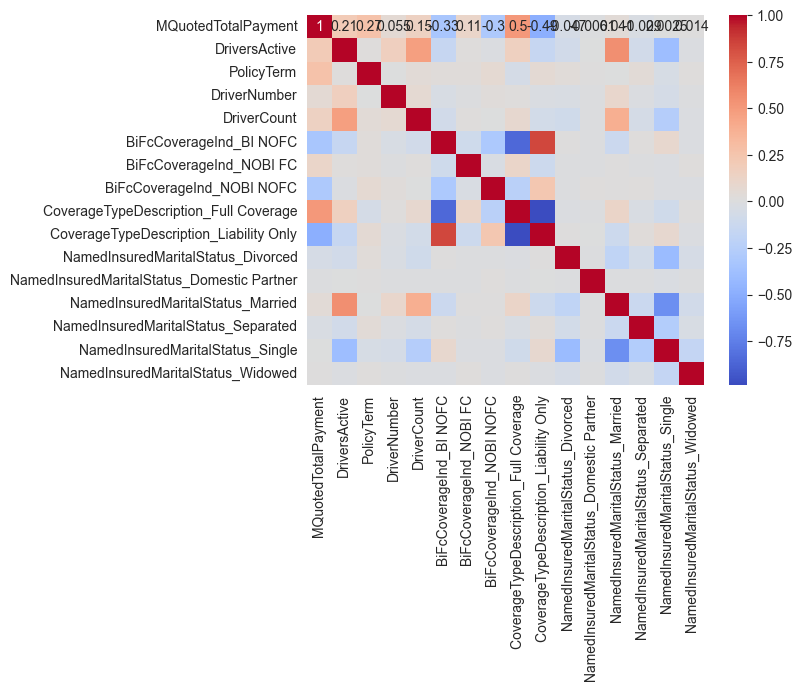

In [16]:
# Select only numeric columns
df_numeric = master_cleaned.select_dtypes(exclude=["object"])

# Generate heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

heatmap for general_cleaned df

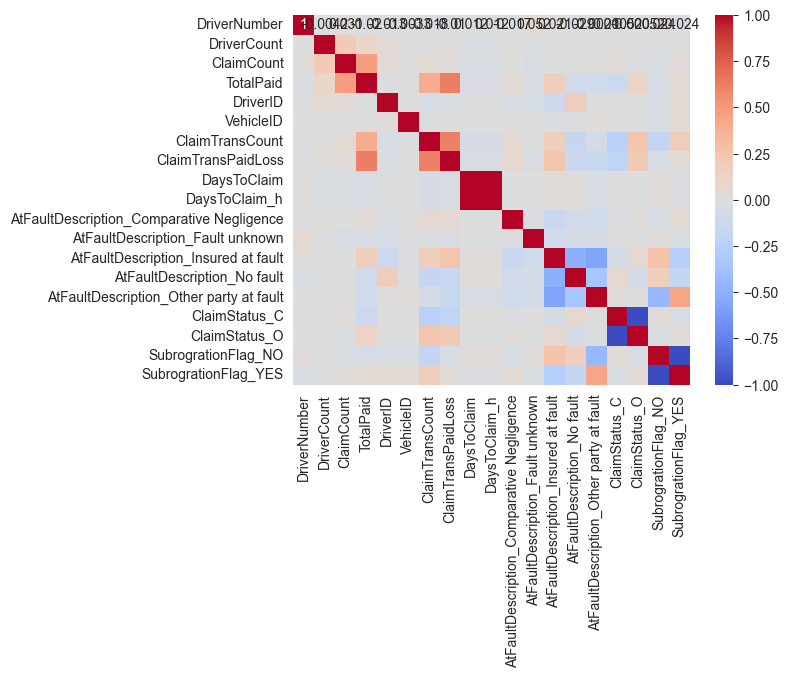

In [17]:
# Select only numeric columns
df_numeric_gen = general_cleaned.select_dtypes(exclude=["object"])

# Generate heatmap
sns.heatmap(df_numeric_gen.corr(), annot=True, cmap="coolwarm")
plt.show()

We can see that there is some correlation between variables in the newly cleaned dataframes

## Summary
* I cleaned each dataframe so that there were no more nan values.
* I then created visulaizations to ensure that all nan values were taken care of.
* After this, I assessed the data and deleted categorical columns that contained information that was unique to each person. This was to ensure these columns did not have dummy variables created for them which would add a significant amount of columns to the dataframe and clutter the dataset.
* I then created dummy variables for all categorical columns that were left which will help me assess the data and incorperate the dataframes into my models that will be implemented in the next step.